In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing


In [11]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


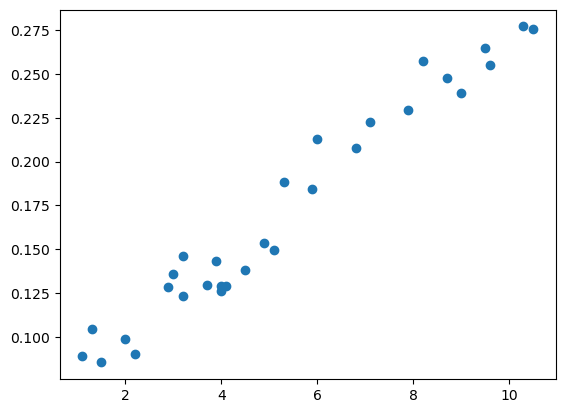

In [12]:
X_old = data['YearsExperience']
Y_old = data['Salary']
Ynorm = preprocessing.normalize([Y_old])
plt.scatter(X_old,Ynorm)

In [13]:
X = np.array(X_old)
Y = np.array(Ynorm[0])
print(X)
print(Y)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
[0.0890741  0.10460994 0.08542447 0.09854232 0.0903148  0.12823972
 0.13618197 0.12326563 0.14590602 0.12947815 0.14312805 0.12631982
 0.12895289 0.12923364 0.13835771 0.15381431 0.14949226 0.18811451
 0.18420904 0.21268387 0.20769845 0.22249395 0.22935172 0.25767486
 0.2477561  0.23904181 0.26482243 0.25501008 0.27709805 0.27592302]


In [14]:
def compute_cost(x, y, w, b): 
    m = len(x)
    total_cost = 0
    f = w*x+b
    total_cost = np.dot(f-y,f-y)
    total_cost = total_cost/(2*m)
    return total_cost

In [15]:
def compute_gradient(x, y, w, b): 
    m = len(x)
    dj_dw = 0
    dj_db = 0
    f = w*x+b
    dj_db = np.sum(f-y)
    dj_db = dj_db/m
    dj_dw = np.dot(f-y,x)
    dj_dw = dj_dw/m
    return dj_dw, dj_db

In [16]:
import math

def gradient_descent(x, y, w,b,alpha, num_iters):
    m = len(x)
    J_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w,b)
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db             
        if i<100000:      
            cost =  compute_cost(x, y, w, b)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.4f} ")
    
    return w,b

In [17]:
w,b = gradient_descent(X,Y,0.1,0.1,0.01,10)
print("w,b found by gradient descent:",w,b)


Iteration    0: Cost   0.0519 
Iteration    1: Cost   0.0208 
Iteration    2: Cost   0.0084 
Iteration    3: Cost   0.0035 
Iteration    4: Cost   0.0015 
Iteration    5: Cost   0.0007 
Iteration    6: Cost   0.0004 
Iteration    7: Cost   0.0003 
Iteration    8: Cost   0.0002 
Iteration    9: Cost   0.0002 
w,b found by gradient descent: 0.017981465666659147 0.08720146874098587


In [18]:
m = X.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X[i] + b

Text(0.5, 0, 'Experience')

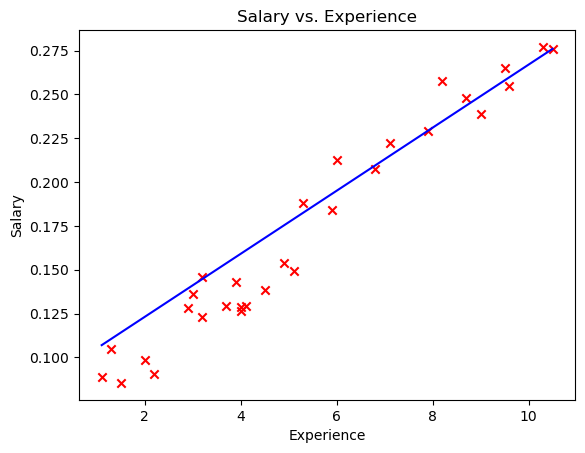

In [19]:
plt.plot(X, predicted, c = "b")
plt.scatter(X,Y, marker='x', c='r') 
plt.title("Salary vs. Experience")
# Set the y-axis label
plt.ylabel('Salary')
# Set the x-axis label
plt.xlabel('Experience')